In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import netCDF4 as nc4

from scipy import interpolate

In [3]:
pmm = "netcdf_files/eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)

glamt = mm.variables['glamt'][0] ; e1t = mm.variables['e1t'][0]
gphit = mm.variables['gphit'][0] ; e2t = mm.variables['e2t'][0] 
# U-V facets
e3t_1d = mm.variables['e3t_1d'][0] ; e3t_0 = mm.variables['e3t_0'][0] ; e3u_0 = mm.variables['e3u_0'][0]; e3v_0 = mm.variables['e3v_0'][0]
# partial cells
e3w_0 = mm.variables['e3w_0'][0] ; e3uw_0 = mm.variables['e3uw_0'][0] ; e3vw_0 = mm.variables['e3vw_0'][0]
e3w_1d = mm.variables['e3w_1d'][0]
#
botl = mm.variables['bottom_level'][0]  # goes from 0 to 74 (75 levels)
bath = mm.variables['bathy_meter'][0]   # goes from 0 to 74 (75 levels)
nK,nJ,nI = np.shape(e3w_0)

zdep = np.cumsum(e3t_1d) # 75 niveau w(k) pour cellule T(k-1)

mm.close()

with open('rpot.npy', 'rb') as f:
    rpot = np.load(f,allow_pickle=True)
print("saved")

saved


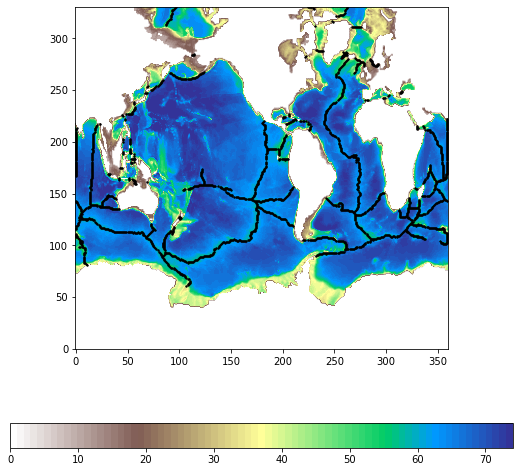

In [4]:
# https://mpl-point-clicker.readthedocs.io/en/latest/
palette = plt.get_cmap("terrain_r",75)
%matplotlib inline
fig, ax = plt.subplots(figsize=(9,9))
cf = plt.imshow(botl, cmap=palette)
fig.colorbar(cf,orientation="horizontal")
ax.set_aspect(aspect='equal')

try : 
    with open('protected_cells_230113.npy', 'rb') as f:
        protected_nodes = np.load(f)
except :
    print("list not found")
plt.scatter(protected_nodes[:,0],protected_nodes[:,1],color="k", s=2)
# add zooming and middle click to pan
ax.invert_yaxis()
ax.patch.set_color('0.7')


plt.show()

In [5]:
Ht = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        Ht[j,i] = np.sum(rpot[:,j,i]*e3t_1d[:])

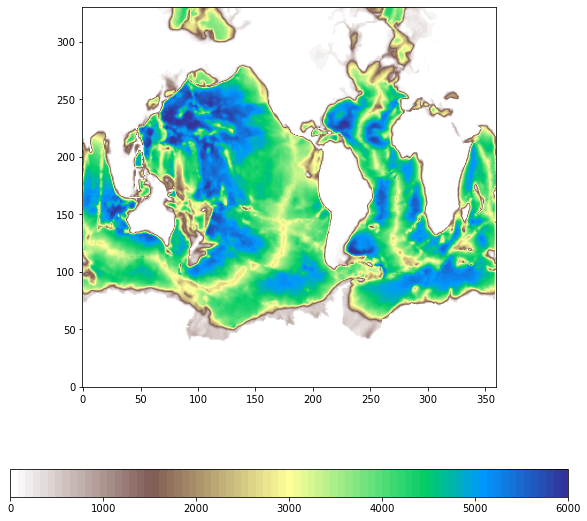

In [6]:
plt.figure(figsize=(10,10))

visu_palette = plt.get_cmap('terrain_r',75)
ax = plt.axes()
im = ax.imshow(Ht,cmap = visu_palette)

ah = np.unravel_index(np.argmax(Ht/bath), Ht.shape)
#plt.scatter(ah[0],ah[1],c="red")

ax.invert_yaxis()
fig.colorbar(im,ax=ax, location='bottom')

